In [2]:
import data_frame
import models
import importlib
import evaluator as ev

In [5]:
filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [7]:
df.data["MAG_GAAP_r"].max()

np.float32(25.945515)

In [8]:
model = models.MLModelContext(strategy=models.ANNSingleGauss(df))
model.train()
model.test_predict()

2025-07-09 14:48:21.080579: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_INVALID_DEVICE: invalid device ordinal
2025-07-09 14:48:21.080603: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-09 14:48:21.080606: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: borsuk
2025-07-09 14:48:21.080608: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: borsuk
2025-07-09 14:48:21.080707: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 570.133.7
2025-07-09 14:48:21.080719: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:201] kernel reported version is: 5

Epoch 49: early stopping
Restoring model weights from the end of the best epoch: 19.


/home/kdrabicki/projekt/models.py:136: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.4881539 1.4715604 1.8151587 ... 1.7261349 3.0677743 2.4032466]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred"] = y_hat
/home/kdrabicki/projekt/models.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.07210274 0.6257103  0.1365958  ... 0.15801476 0.19940318 0.28044367]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  self.dataFrame.data.loc[indexes, "Z_pred_std"] = y_std


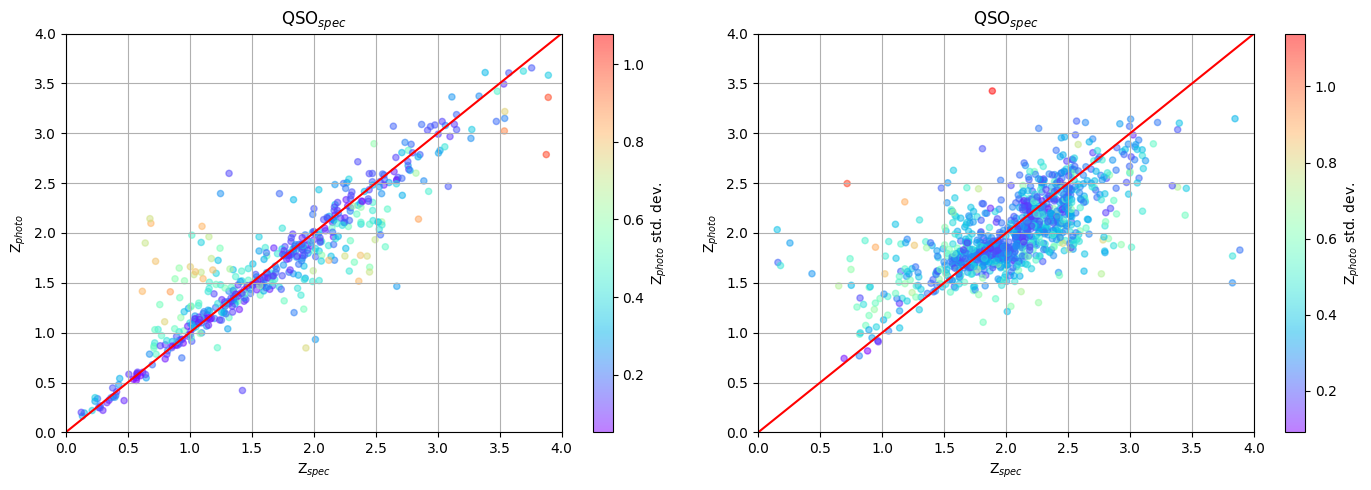

,MSE,R^2,Redshift error
test,0.094233,0.831859,"(0.011605466157702604, 0.13809552423886748)"
faint,0.212948,0.376185,"(-0.003972067615740899, 0.1634306899467116)"


In [9]:
importlib.reload(ev)
evaluator = ev.Evaluator(df)
evaluator.redshift_with_std_plot()
evaluator.evaluate_metrics()